Write down something like:

$D_1 = F_1 G(-s/2) - F_1 G(+s/2)$

$D_2 = F_2 G(-s'/2) - F_2 G(+s'/2)$

Where $G(x)$ is a normalized Gaussian centered at $x$.

Setting $D_1 = D_2$ (in the case where the two signatures are the same):

$F_1 [G(-s/2) - G(+s/2)] = F_2 [G(-s'/2) - G(+s'/2)]$

or

$F_1/F_2 = \frac{[G(-s'/2) - G(+s'/2)]}{[G(-s/2) - G(+s/2)]}$

Then you solve for $F_1/F_2$ as a function of $s$ and $s'$ (maybe by expanding in a Taylor series). 

In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
import sympy.stats as symstat

sym.init_printing()

x,y,z=sym.symbols("x y z")
k,m,n=sym.symbols("k m n", integer=True)

Let's play around with `sympy`. Useful pages:

http://docs.sympy.org/dev/modules/stats.html

http://docs.sympy.org/dev/modules/index.html

http://docs.sympy.org/dev/modules/series.html#more-intuitive-series-expansion

In [3]:
x,F,m = sym.symbols("x F m")
s = sym.Symbol('s', positive=True)
G = F * sym.exp(-(x-m)**2/(2*s**2))
G

In [4]:
G.evalf(subs={x: 0, F: 1, m: 0, s: 1})

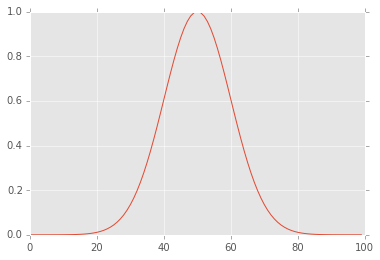

In [5]:
import numpy as np
qq = [G.evalf(subs={x: xx, F: 1, m: 0, s: 1}) for xx in np.arange(-5,5,0.1)]
plt.plot(qq)

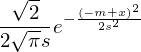

In [6]:
N = symstat.Normal("G", m, s)
G = symstat.density(N)(x)
G

0.999999414352767
erf(sqrt(2)*(-m + x)/(2*s))/2


/Users/dreiss/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


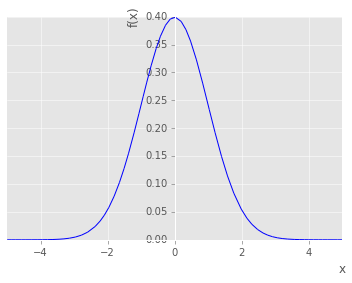

In [7]:
qq = [G.evalf(subs={x: xx, m: 0, s: 1}) for xx in np.arange(-5,5,0.1)]
print sum(qq)*0.1
print sym.integrate(G, x)
#plt.plot(qq)

import sympy.plotting as symplot
symplot.plot(G.subs({m: 0, s: 1}), (x,-5,5))

Taylor series -- compare to

http://www.wolframalpha.com/input/?i=gaussian+function+taylor+series

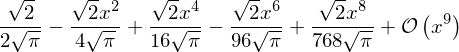

In [8]:
G.subs({m: 0, s: 1}).series(x, n=9)  ##.simplify()

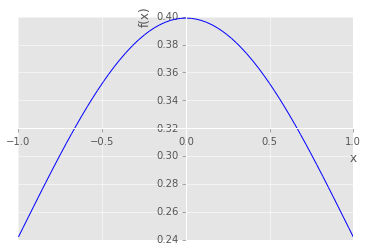

In [32]:
symplot.plot(G.subs({m: 0, s: 1}).series(x, n=9).removeO().subs({m: 1}), (x,-1,1))

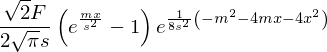

In [53]:
x,F,m = sym.symbols("x F m")
s = sym.Symbol('s', positive=True)

D = F * (G.subs(m, +m/2) - G.subs(m, -m/2))
sym.simplify(D)

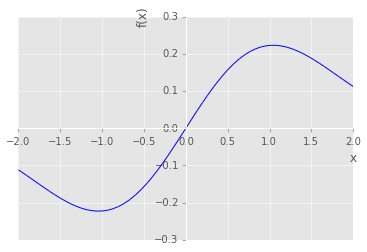

In [56]:
#qq = [D.evalf(subs={x: xx, F: 1, m: 1, s: 1}) for xx in np.arange(-5,5,0.1)]
#plt.plot(qq)
symplot.plot(D.subs({F: 1, m: 1, s: 1}), (x,-2,2))

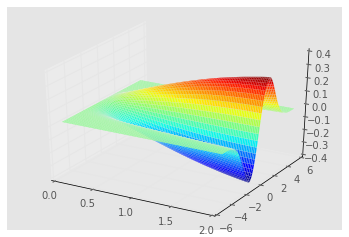

In [57]:
symplot.plot3d(D.subs({F: 1, s: 1}), (m,0,2), (x,-5,5), nb_of_points_x=100, nb_of_points_y=100)


In [58]:
D.evalf(subs={x: 0, F: 1, m: 1, s: 2})

Solve for two equal dipoles as a function of $F_1$, $F_2$, $m_1$, $m_2$.

First solve for $F_1$.

Also set $s = 1$ for simplicity.

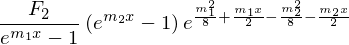

In [59]:
F1, m1, F2, m2 = sym.symbols("F1 m1 F2 m2")

q1 = sym.solve(D.subs({F: F1, m: m1, s: 1}) - D.subs({F: F2, m: m2, s: 1}), F1)[0]
q1

Next solve for $F_2$.

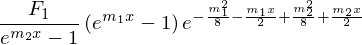

In [60]:
q2 = sym.solve(D.subs({F: F1, m: m1, s: 1}) - D.subs({F: F2, m: m2, s: 1}), F2)[0]
q2

Compute for $F = F_1/F_2$ and $m = m_1/m_2$. In other words, set $F_1 = F$ and $F_2 = 1$. Likewise, $m_1 = m$ and $m_2 = 1$.

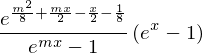

In [61]:
sym.solve(D.subs({s: 1}) - D.subs({F: 1, m: 1, s: 1}), F)[0]

Compare the above to what we solved when we set two dipoles to be identical (see first cell):

$\frac{F_1}{F_2} = \frac{G(-s'/2) - G(s'/2)}{G(-s/2) - G(s/2)}$

and set $s = s/s'$ and $s' = 1$

Compute $F = F_1 / F_2$ as a function of $m = m_1 / m_2$.

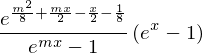

In [62]:
FR = D.subs({F: 1, m: 1, s: 1}) / D.subs({F: 1, s: 1})
FR = FR.simplify()
FR

Yay, it's the same!

Plot log($F$) (= log($F_1 / F_2$)) as a function of $m$ (= $m_2/m_1$).

Note this is different for different values of $x$. What does this mean?

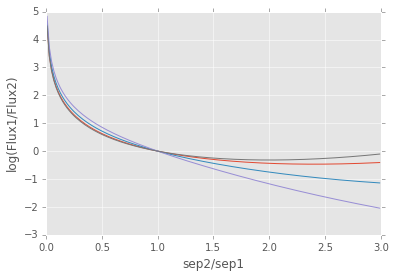

In [63]:
xvals = np.arange(0.01, 3., 0.02)
qq = [float(FR.evalf(subs={x: 1, m: mm})) for mm in xvals]
plt.plot(xvals, np.log(np.array(qq)))
qq2 = [float(FR.evalf(subs={x: 2, m: mm})) for mm in xvals]
plt.plot(xvals, np.log(np.array(qq2)))
qq3 = [float(FR.evalf(subs={x: 3, m: mm})) for mm in xvals]
plt.plot(xvals, np.log(np.array(qq3)))
qq4 = [float(FR.evalf(subs={x: 0.1, m: mm})) for mm in xvals]
plt.plot(xvals, np.log(np.array(qq4)))
plt.xlabel('sep2/sep1'); plt.ylabel('log(Flux1/Flux2)')
plt.show()

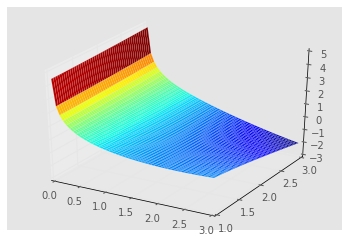

In [64]:
symplot.plot3d(sym.log(FR), (m,0.01,3.), (x,1,3))

OK, it looks like dipoles are very similar but not exactly the same over a range of x (pixel coords in this case).

So let's try integrating the dipole func. over $x$ and find the minimum...

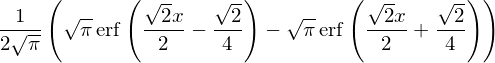

In [21]:
sym.integrate(D.subs({F: 1, m: 1, s: 1}))

OK, that was the dipole. Now we need to integrate the difference between 2 different dipoles...

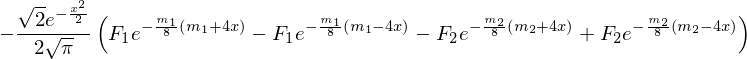

In [23]:
DP_diff = D.subs({F: F1, m: m1, s: 1}) - D.subs({F: F2, m: m2, s: 1})
sym.simplify(DP_diff)

In [ ]:
FR_int = sym.integrate(FR.subs({F1: 1, m1: 1}), x)

Try to do a Taylor series expansion on the log(flux1/flux2) as a function of sep2/sep1...

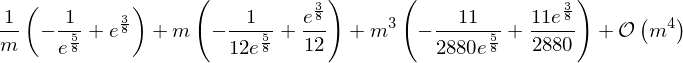

In [201]:
#lFR = sym.log(FR)
FR.subs({x: 1}).series(x=m, x0=0, n=4)

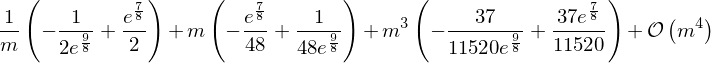

In [196]:
FR.subs({x: 2}).series(x=m, x0=0, n=4)

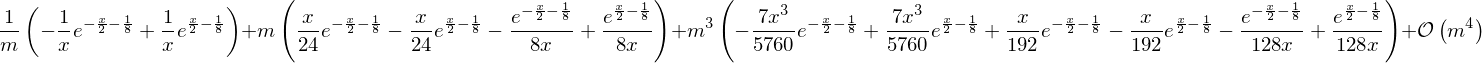

In [197]:
FR.series(x=m, x0=0, n=4)

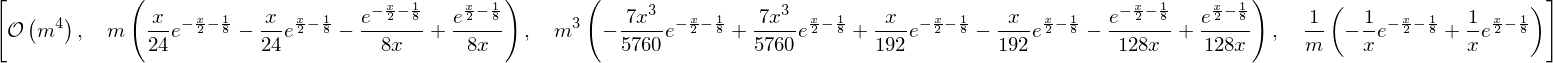

In [205]:
FR.series(x=m, x0=0, n=4).as_coefficients_dict().keys()